---
> ## **데이터 활용 실습**
> ### 애플 주식 데이터
> - apple_stock_nan_example.csv
---

In [1]:
from matplotlib import font_manager, rc
font_fname = 'C://Users//skyme//OneDrive//바탕 화면//폰트//NanumFontSetup_TTF_GOTHIC//NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font',family=font_name)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False

In [3]:
df = pd.read_csv("apple_stock_nan_example.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...,...
2260,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2261,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2262,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2263,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


> ## **데이터 특징**
- **주식 데이터**이기에 **마이너스 값**이 나올 수 없는데 마이너스 값이 min 값에 있음
- **이상치** 처리 필요

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2264.0,1.002724e+02,4.716662e+01,28.0,6.217643e+01,9.553214e+01,1.268350e+02,2.334700e+02
Low,2265.0,8.907804e+01,3.044064e+02,-9999.0,6.090000e+01,9.357000e+01,1.248500e+02,2.297800e+02
Open,2263.0,9.395832e+01,2.197789e+02,-9999.0,6.162643e+01,9.455000e+01,1.258950e+02,2.307800e+02
Close,2264.0,8.999478e+01,3.045567e+02,-9999.0,6.145428e+01,9.447643e+01,1.257175e+02,2.320700e+02
Volume,2263.0,8.008152e+07,5.969623e+07,-9999.0,3.440725e+07,6.339830e+07,1.076492e+08,4.702495e+08
Adj Close,2264.0,8.850003e+01,5.686483e+01,-999.0,4.583006e+01,8.649564e+01,1.181914e+02,2.312631e+02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2264 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2263 non-null   float64
 4   Close      2264 non-null   float64
 5   Volume     2263 non-null   float64
 6   Adj Close  2264 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


- **결측치**가 있는 열 : **High, Open, Close, Volumn, Adj Close**

In [6]:
df.isnull().sum()

Date         0
High         1
Low          0
Open         2
Close        1
Volume       2
Adj Close    1
dtype: int64

> ## **Date**를 중심으로 시각화하여 전처리 시작

### **1) 날짜가 겹치는 날이 없음**
- unique했을 때 행과 shape의 행의 크기가 같음

In [7]:
print(len(df.Date.unique()))
print(df.shape)

2265
(2265, 7)


### **2) 연도의 범위 : 2009 ~ 2018**

In [8]:
df.Date.str[0:4].unique()

array(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'], dtype=object)

### **3) 연도, 월 열 생성하기**

In [9]:
df.insert(0,'Year',df.Date.str[0:4])
df

,Year,Date,High,Low,Open,Close,Volume,Adj Close
0,2009,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...,...,...
2260,2018,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2261,2018,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2262,2018,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2263,2018,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [10]:
df.insert(1,'Month',df.Date.str[5:7])
df

,Year,Month,Date,High,Low,Open,Close,Volume,Adj Close
0,2009,12,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010,01,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010,01,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010,01,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010,01,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...,...,...,...
2260,2018,12,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2261,2018,12,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2262,2018,12,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2263,2018,12,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [11]:
df.insert(2,'Day',df.Date.str[8:10])
df

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
0,2009,12,31,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010,01,04,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010,01,05,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010,01,06,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010,01,07,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...,...,...,...,...
2260,2018,12,24,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2261,2018,12,26,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2262,2018,12,27,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2263,2018,12,28,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


### **4) 연도를 x축에 놓고 전처리**
- 다른 컬럼 데이터 전처리 하기

> ## **High**
> - 데이터의 분포는 나쁘지 않음
> - **결측치 평균값으로 바꾸기**

<AxesSubplot: xlabel='Year', ylabel='High'>

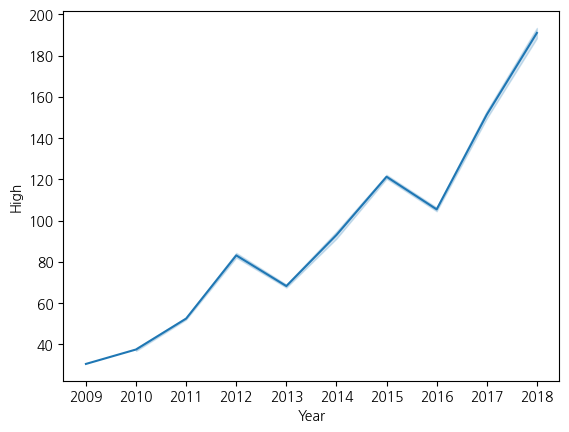

In [12]:
sns.lineplot(x = 'Year', y= 'High',data = df)

<AxesSubplot: xlabel='Year', ylabel='High'>

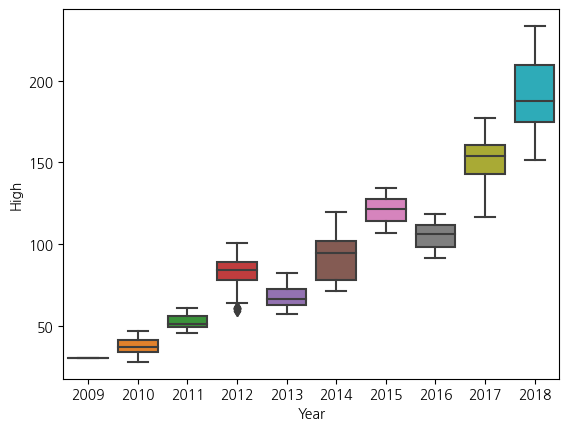

In [13]:
sns.boxplot(x = 'Year', y= 'High',data = df)

#### **high 결측치**
- 2017년 10월 27일 데이터

In [14]:
df[df.High.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
1970,2017,10,27,2017-10-27,NaN,158.699997,159.289993,163.050003,44454200.0,160.062897


#### **2017년의 High 시각화**

<AxesSubplot: xlabel='Month', ylabel='High'>

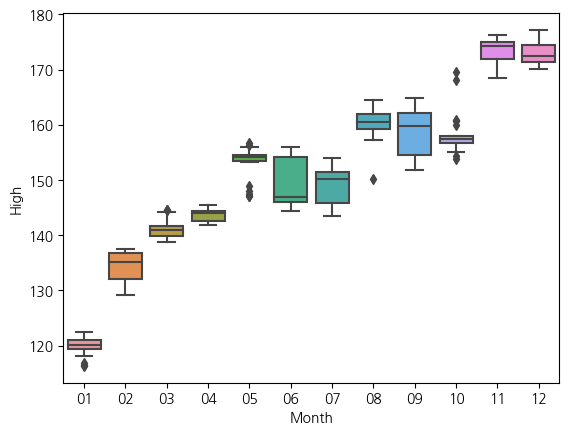

In [15]:
sns.boxplot(x='Month',y='High',data = df[df.Year == '2017'])

<AxesSubplot: xlabel='Month', ylabel='High'>

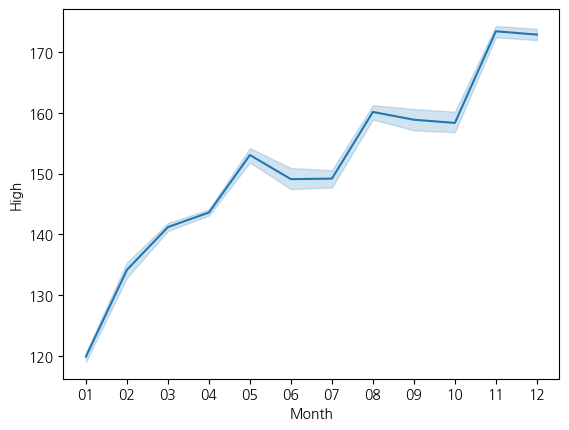

In [16]:
sns.lineplot(x='Month', y='High',data = df[df.Year == '2017'])

#### **결측치 처리**
- 2017년 10월 평균으로 대체

In [17]:
df_2017_10 = df[(df.Year == '2017') & (df.Month == '10')]

In [18]:
df_2017_10.High.mean()

158.3480951218378

In [19]:
df.High.fillna(df_2017_10.High.mean(),inplace=True)
df.High.isnull().sum()

0

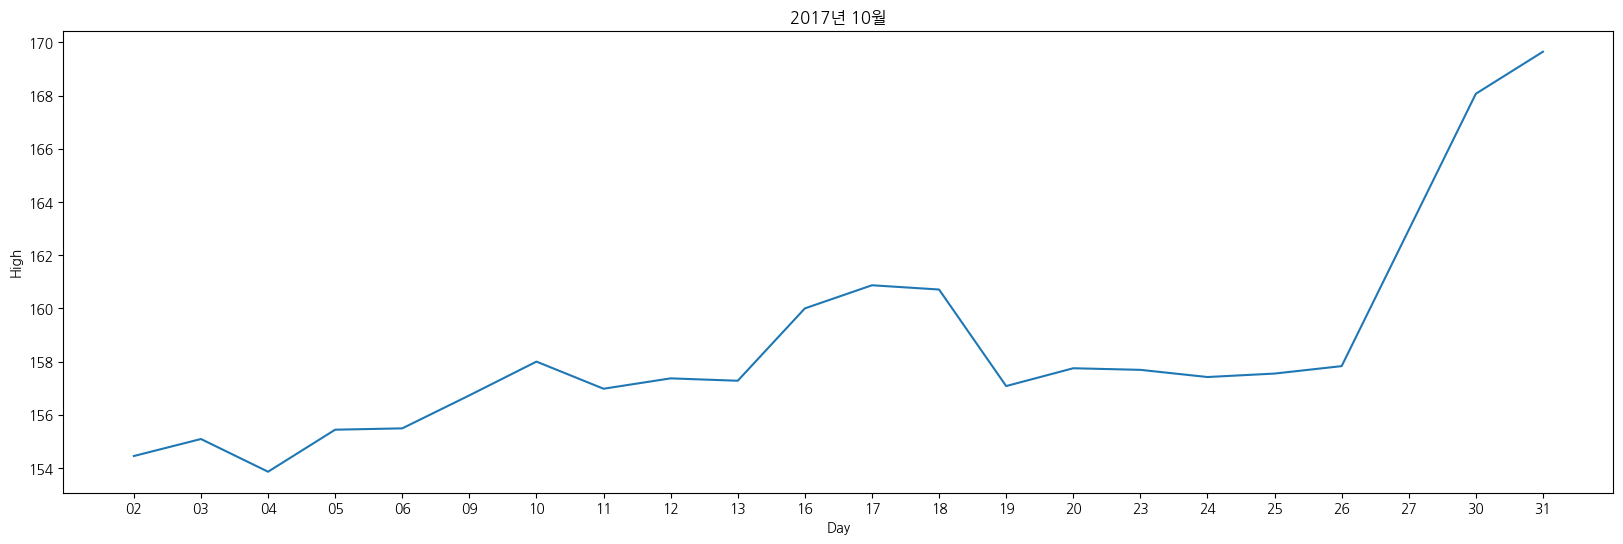

In [20]:
plt.figure(figsize=(20,6))
plt.title('2017년 10월')
fig = sns.lineplot(x= 'Day', y= 'High',data = df_2017_10)

> ## **Low**
> -  **이상치** 처리 필요

<AxesSubplot: xlabel='Year', ylabel='Low'>

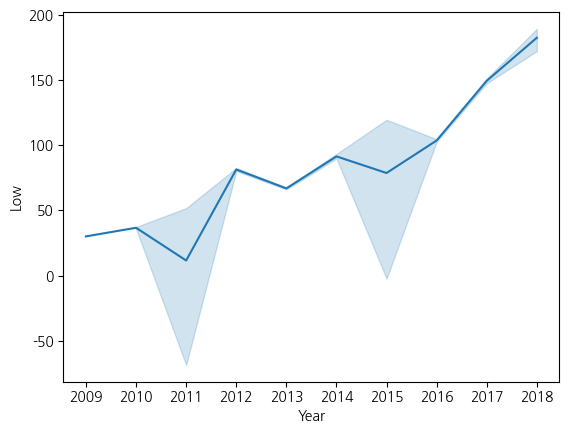

In [21]:
sns.lineplot(x ='Year',y='Low', data = df)

<AxesSubplot: >

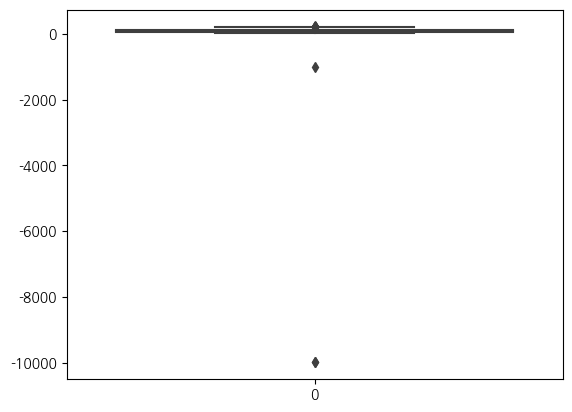

In [22]:
sns.boxplot(data = df.Low)

#### **이상치 처리**
- 0보다 작은 값은 nan으로 바꾼뒤 평균값을 넣어준다
- 바로 평균값으로만 대체하면 -값이 평균값이 될 수 있다

In [23]:
df[df.Low < 0]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
400,2011,08,03,2011-08-03,56.221428,-9999.0,55.854286,56.081429,183127000.0,37.555653
1477,2015,11,12,2015-11-12,116.820000,-9999.0,116.260002,115.720001,32525600.0,109.761932
2014,2018,01,02,2018-01-02,172.300003,-999.0,170.160004,172.259995,25555900.0,169.712067


In [24]:
df.Low.replace(-9999.0,np.nan,inplace=True)
df.Low.replace(-999.0,np.nan,inplace=True)
df[df.Low.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
400,2011,08,03,2011-08-03,56.221428,NaN,55.854286,56.081429,183127000.0,37.555653
1477,2015,11,12,2015-11-12,116.820000,NaN,116.260002,115.720001,32525600.0,109.761932
2014,2018,01,02,2018-01-02,172.300003,NaN,170.160004,172.259995,25555900.0,169.712067


- 평균값이 확인 후 각각 다른 평균값을 대입

In [25]:
print(df[(df.Year == '2011') & (df.Month == '08')].Low.mean())
print(df[(df.Year == '2015') & (df.Month == '11')].Low.mean())
print(df[(df.Year == '2018') & (df.Month == '01')].Low.mean())

52.94928550720215
117.34105240671258
172.99600143432616


In [26]:
df.iloc[400,5] = df[(df.Year == '2011') & (df.Month == '08')].Low.mean()
df.iloc[1477,5] = df[(df.Year == '2015') & (df.Month == '11')].Low.mean()
df.iloc[2014,5] = df[(df.Year == '2018') & (df.Month == '08')].Low.mean()

In [27]:
df[df.Low.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close


#### **Low 열 전처리 처리 완료 후 시각화**

<AxesSubplot: xlabel='Year', ylabel='Low'>

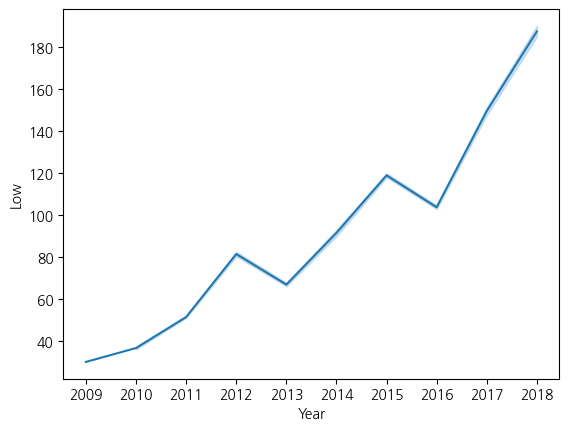

In [28]:
sns.lineplot(x ='Year',y='Low', data = df)

<AxesSubplot: >

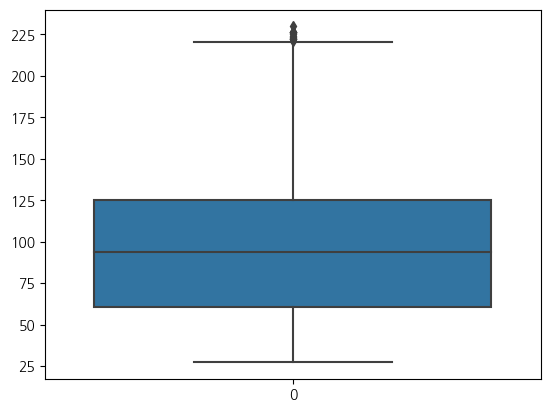

In [29]:
sns.boxplot(data = df.Low)

> ## **Open**
> -  **이상값** 처리 필요
> - **결측치** 존재

<AxesSubplot: xlabel='Year', ylabel='Open'>

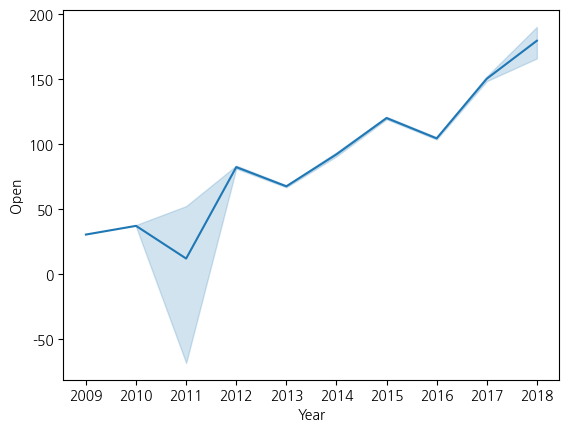

In [30]:
sns.lineplot(x ='Year',y='Open', data = df)

<AxesSubplot: >

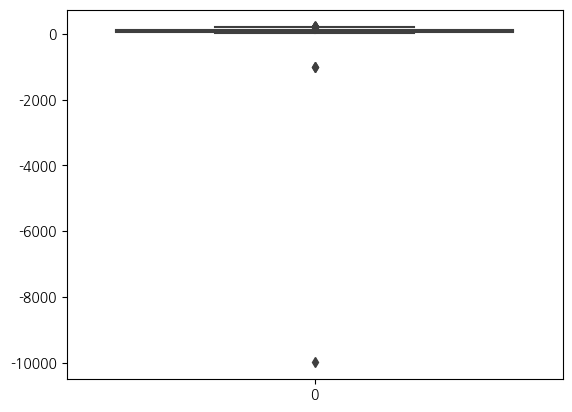

In [31]:
sns.boxplot(data = df.Open)

#### **이상치, 결측치 처리**
- 0보다 작은 값은 nan으로 바꾼뒤 평균값을 넣어준다
- 바로 평균값으로만 대체하면 -값이 평균값이 될 수 있다

In [32]:
df[df['Open'] < 0]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
418,2011,08,29,2011-08-29,55.928570,55.428570,-9999.0,55.709999,101317300.0,37.306915
2027,2018,01,22,2018-01-22,177.779999,176.600006,-999.0,177.000000,27108600.0,174.381973
2063,2018,03,14,2018-03-14,180.520004,177.809998,-999.0,178.440002,29368400.0,176.517426


In [33]:
df.Open.replace(-9999.0,np.nan,inplace=True)
df.Open.replace(-999.0,np.nan,inplace=True)
df[df.Open.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
335,2011,05,02,2011-05-02,50.067142,49.357143,NaN,49.468571,110678400.0,33.127262
418,2011,08,29,2011-08-29,55.928570,55.428570,NaN,55.709999,101317300.0,37.306915
1483,2015,11,20,2015-11-20,119.919998,118.849998,NaN,119.300003,34287100.0,113.157593
2027,2018,01,22,2018-01-22,177.779999,176.600006,NaN,177.000000,27108600.0,174.381973
2063,2018,03,14,2018-03-14,180.520004,177.809998,NaN,178.440002,29368400.0,176.517426


- 평균값이 확인 후 각각 다른 평균값을 대입

In [34]:
print(df[(df.Year == '2011') & (df.Month == '05')].Open.mean())
print(df[(df.Year == '2011') & (df.Month == '08')].Open.mean())
print(df[(df.Year == '2015') & (df.Month == '11')].Open.mean())
print(df[(df.Year == '2018') & (df.Month == '01')].Open.mean())
print(df[(df.Year == '2018') & (df.Month == '03')].Open.mean())

48.79978561401367
53.82344124533913
118.1663155806692
173.85749893188478
174.78349990844725


In [35]:
df.iloc[335,6] = df[(df.Year == '2011') & (df.Month == '05')].Open.mean()
df.iloc[418,6] = df[(df.Year == '2011') & (df.Month == '08')].Open.mean()
df.iloc[1483,6] = df[(df.Year == '2015') & (df.Month == '11')].Open.mean()
df.iloc[2027,6] = df[(df.Year == '2018') & (df.Month == '01')].Open.mean()
df.iloc[2063,6] = df[(df.Year == '2018') & (df.Month == '03')].Open.mean()

In [36]:
df[df.Open.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close


#### **Open 열 전처리 처리 완료 후 시각화**

<AxesSubplot: xlabel='Year', ylabel='Open'>

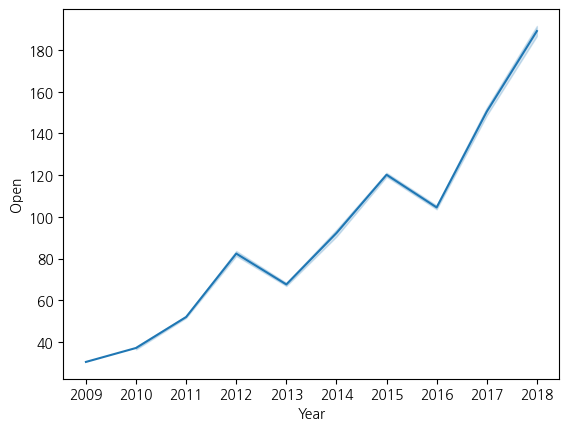

In [37]:
sns.lineplot(x ='Year',y='Open', data = df)

<AxesSubplot: >

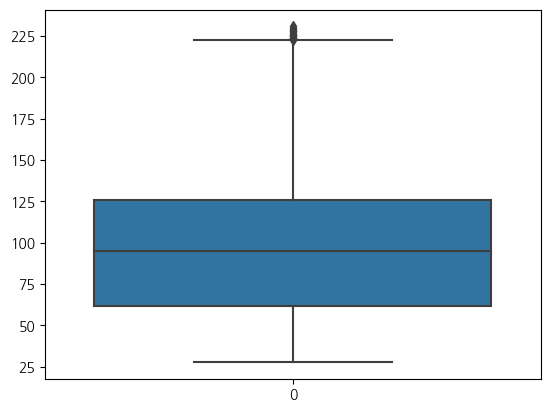

In [38]:
sns.boxplot(data = df.Open)

> ## **Close**
> -  **이상치** 처리 필요
> - **결측치** 존재

<AxesSubplot: xlabel='Year', ylabel='Close'>

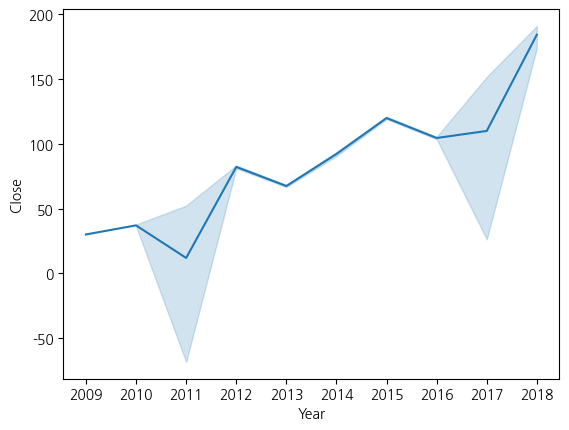

In [39]:
sns.lineplot(x ='Year',y='Close', data = df)

<AxesSubplot: >

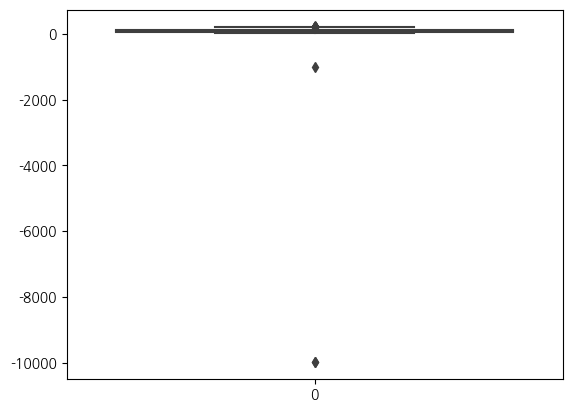

In [40]:
sns.boxplot(data = df.Close)

#### **이상치, 결측치 처리**
- 0보다 작은 값은 nan으로 바꾼뒤 평균값을 넣어준다
- 바로 평균값으로만 대체하면 -값이 평균값이 될 수 있다

In [41]:
df[df['Close'] < 0]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
405,2011,08,10,2011-08-10,53.521427,51.785713,53.021427,-9999.0,219664200.0,34.792809
1974,2017,11,02,2017-11-02,168.500000,165.279999,166.600006,-9999.0,41393400.0,165.030197
2095,2018,04,30,2018-04-30,167.259995,161.839996,162.130005,-999.0,42427400.0,163.479431


In [42]:
df.Close.replace(-9999.0,np.nan,inplace=True)
df.Close.replace(-999.0,np.nan,inplace=True)
df[df.Close.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
353,2011,05,26,2011-05-26,48.127144,47.775715,47.995716,NaN,55640200.0,32.048145
405,2011,08,10,2011-08-10,53.521427,51.785713,53.021427,NaN,219664200.0,34.792809
1974,2017,11,02,2017-11-02,168.500000,165.279999,166.600006,NaN,41393400.0,165.030197
2095,2018,04,30,2018-04-30,167.259995,161.839996,162.130005,NaN,42427400.0,163.479431


- 평균값이 확인 후 각각 다른 평균값을 대입

In [43]:
print(df[(df.Year == '2011') & (df.Month == '05')].Close.mean())
print(df[(df.Year == '2011') & (df.Month == '08')].Close.mean())
print(df[(df.Year == '2017') & (df.Month == '11')].Close.mean())
print(df[(df.Year == '2018') & (df.Month == '04')].Close.mean())

48.87485694885254
53.90811694752086
172.62100067138672
170.0630012512207


In [44]:
df.iloc[353,7] = df[(df.Year == '2011') & (df.Month == '05')].Close.mean()
df.iloc[405,7] = df[(df.Year == '2011') & (df.Month == '08')].Close.mean()
df.iloc[1974,7] = df[(df.Year == '2017') & (df.Month == '11')].Close.mean()
df.iloc[2095,7] = df[(df.Year == '2018') & (df.Month == '04')].Close.mean()

In [45]:
df[df.Close.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close


#### **Close 열 전처리 처리 완료 후 시각화**

<AxesSubplot: xlabel='Year', ylabel='Close'>

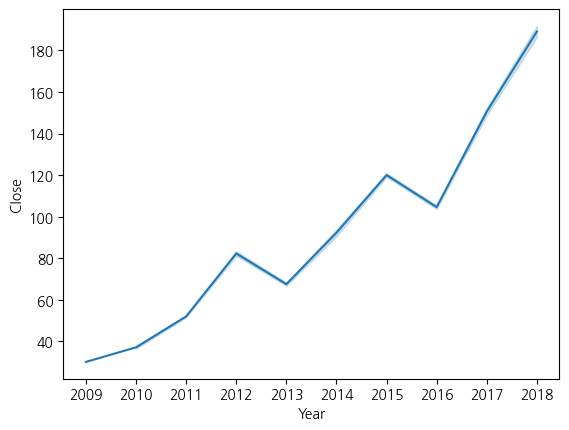

In [46]:
sns.lineplot(x ='Year',y='Close', data = df)

<AxesSubplot: >

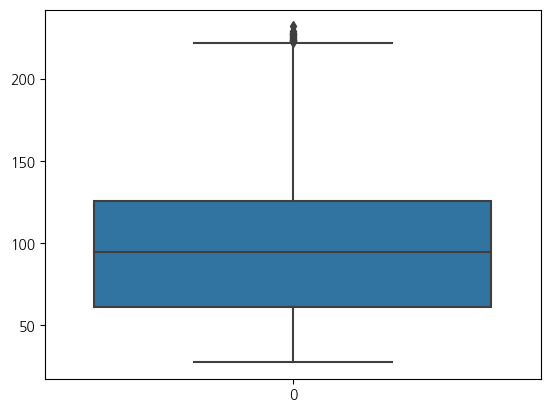

In [47]:
sns.boxplot(data = df.Close)

> ## Volume
> -  **이상치** 처리 필요
> - **결측치** 존재

<AxesSubplot: xlabel='Year', ylabel='Volume'>

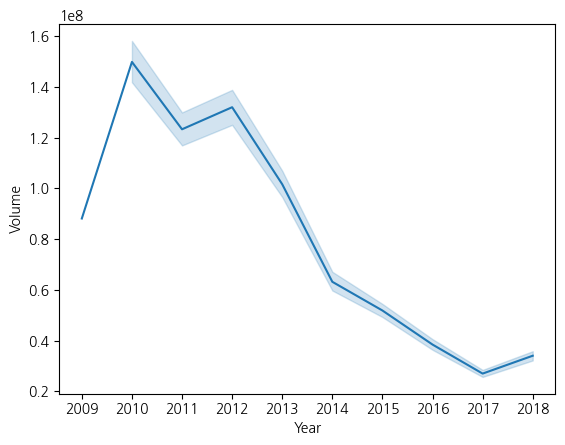

In [48]:
sns.lineplot(x ='Year',y='Volume', data = df)

<AxesSubplot: >

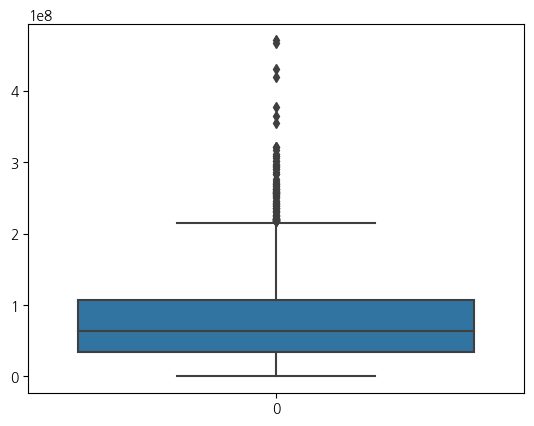

In [49]:
sns.boxplot(data = df.Volume)

#### **이상치,결측치 처리**
- 0보다 작은 값은 nan으로 바꾼뒤 평균값을 넣어준다
- 바로 평균값으로만 대체하면 -값이 평균값이 될 수 있다

In [50]:
df[df.Volume< 0]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
1994,2017,12,01,2017-12-01,171.669998,168.5,169.949997,171.050003,-9999.0,168.519974


In [51]:
df.Volume.replace(-9999.0,np.nan,inplace=True)
df[df.Volume.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
346,2011,05,17,2011-05-17,48.020000,47.247143,47.428570,48.020000,NaN,32.157211
374,2011,06,27,2011-06-27,47.700001,46.750000,46.798573,47.434284,NaN,31.764973
1994,2017,12,01,2017-12-01,171.669998,168.500000,169.949997,171.050003,NaN,168.519974


In [52]:
print(df[(df.Year == '2011') & (df.Month == '05')].Volume.mean())
print(df[(df.Year == '2011') & (df.Month == '06')].Volume.mean())
print(df[(df.Year == '2017') & (df.Month == '12')].Volume.mean())

80746575.0
106238533.33333333
25846010.52631579


In [53]:
df.iloc[346,8] = df[(df.Year == '2011') & (df.Month == '05')].Volume.mean()
df.iloc[374,8] = df[(df.Year == '2011') & (df.Month == '06')].Volume.mean()
df.iloc[1994,8] = df[(df.Year == '2017') & (df.Month == '12')].Volume.mean()

In [54]:
df[df.Volume.isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close


#### **Volume 열 전처리 처리 완료 후 시각화**

<AxesSubplot: xlabel='Year', ylabel='Volume'>

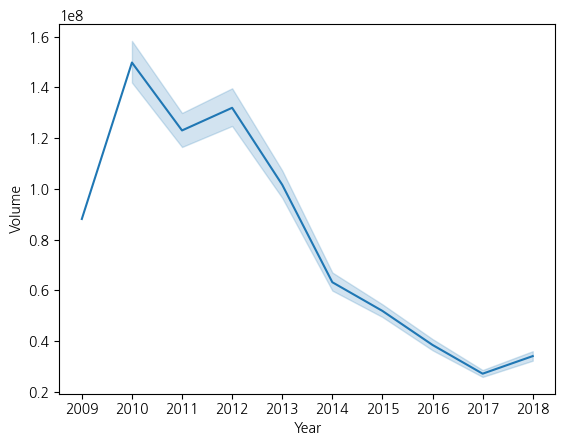

In [55]:
sns.lineplot(x ='Year',y='Volume', data = df)

<AxesSubplot: >

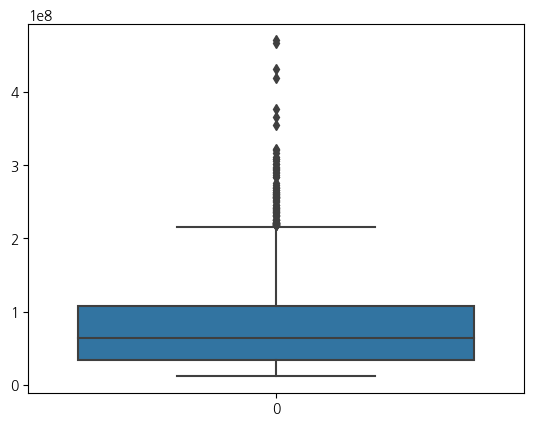

In [56]:
sns.boxplot(data = df.Volume)

> ## **Adj Close** 
> - 수정 종가, 마지막으로 거래된 주가
> -  **이상치** 처리 필요
> - **결측치** 존재

<AxesSubplot: xlabel='Year', ylabel='Adj Close'>

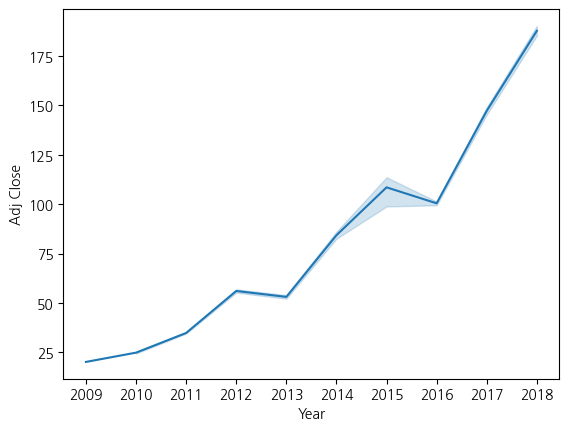

In [57]:
sns.lineplot(x ='Year',y='Adj Close', data = df)

<AxesSubplot: >

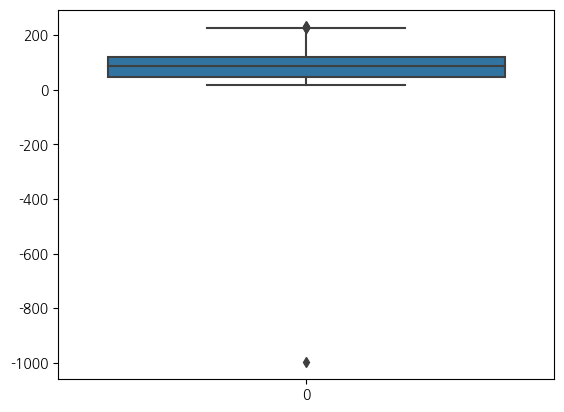

In [58]:
sns.boxplot(data = df['Adj Close'])

In [59]:
df[df['Adj Close'] < 0]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
1425,2015,08,31,2015-08-31,114.529999,112.0,112.029999,112.760002,56229300.0,-999.0


In [60]:
df['Adj Close'].replace(-999.0,np.nan,inplace=True)
df[df['Adj Close'].isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
1406,2015,08,04,2015-08-04,117.699997,113.25,117.419998,114.639999,124138600.0,NaN
1425,2015,08,31,2015-08-31,114.529999,112.00,112.029999,112.760002,56229300.0,NaN


In [61]:
print(df[(df.Year == '2015') & (df.Month == '08')]['Adj Close'].mean())

107.01524071944387


In [62]:
df['Adj Close'].fillna(df[(df.Year == '2015') & (df.Month == '08')]['Adj Close'].mean(),inplace =True)

In [63]:
df[df['Adj Close'].isnull()]

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close


#### **Adj Close 열 전처리 처리 완료 후 시각화**

<AxesSubplot: xlabel='Year', ylabel='Adj Close'>

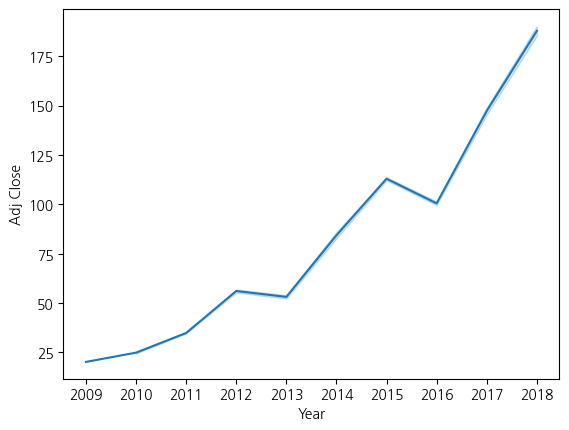

In [64]:
sns.lineplot(x ='Year',y='Adj Close', data = df)

<AxesSubplot: >

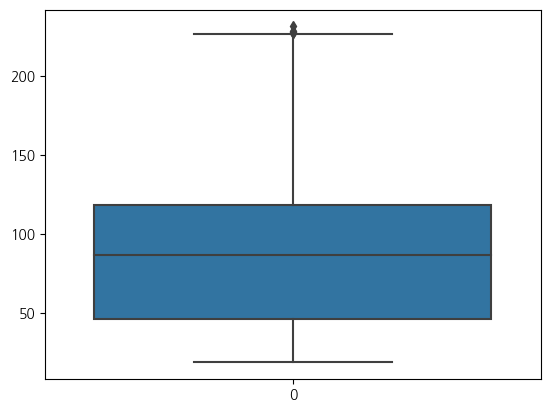

In [65]:
sns.boxplot(data = df['Adj Close'])

> ## **데이터 전처리 완료**

In [66]:
df.isnull().sum()

Year         0
Month        0
Day          0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0.5, 1.0, '2008년-2018년 고가, 저가 그래프')

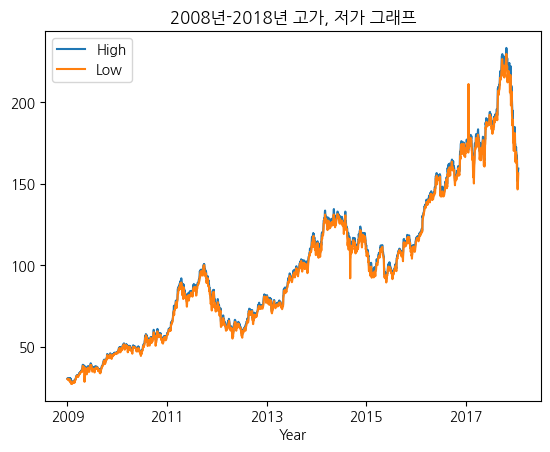

In [67]:
df.plot(x='Year',y=['High','Low'])
plt.title("2008년-2018년 고가, 저가 그래프")

Text(0.5, 1.0, '2008년-2018년 거래량 그래프')

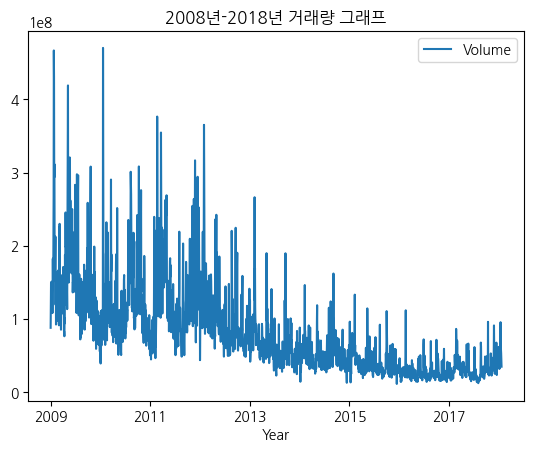

In [68]:
df.plot(x='Year',y='Volume')
plt.title("2008년-2018년 거래량 그래프")

In [69]:
df.groupby('Year').Volume.sum().sort_index()

Year
2009    8.810270e+07
2010    3.775623e+10
2011    3.100378e+10
2012    3.299105e+10
2013    2.560539e+10
2014    1.591449e+10
2015    1.306315e+10
2016    9.680622e+09
2017    6.796513e+09
2018    8.537986e+09
Name: Volume, dtype: float64

Text(0.5, 1.0, '연도별 거래량 합')

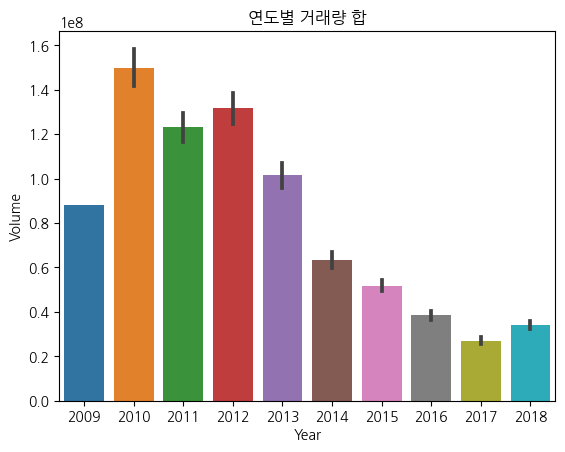

In [70]:
sns.barplot(data = df, x='Year',y='Volume')
plt.title("연도별 거래량 합")

Text(0.5, 1.0, '2008년-2018년 시작가격, 종가 그래프')

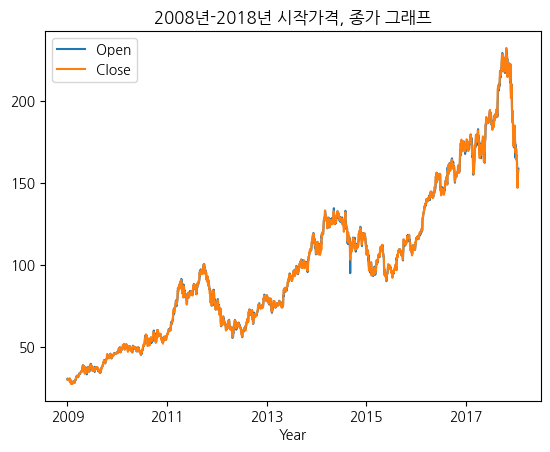

In [71]:
df.plot(x='Year',y=['Open','Close'])
plt.title("2008년-2018년 시작가격, 종가 그래프")

> ## **상관관계 알아보기**
> - 대체적으로 상관관계가 매우 높다

#### 연속형 변수끼리의 상관분석

In [72]:
df_corr = df.iloc[:,4:].corr()
df_corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999525,0.999818,0.999785,-0.627046,0.993371
Low,0.999525,1.000000,0.999564,0.999629,-0.635055,0.993380
Open,0.999818,0.999564,1.000000,0.999563,-0.629808,0.993187
Close,0.999785,0.999629,0.999563,1.000000,-0.631403,0.993635
Volume,-0.627046,-0.635055,-0.629808,-0.631403,1.000000,-0.659065
Adj Close,0.993371,0.993380,0.993187,0.993635,-0.659065,1.000000


#### volume 변수는 다른 변수들과 상관관계가 떨어짐

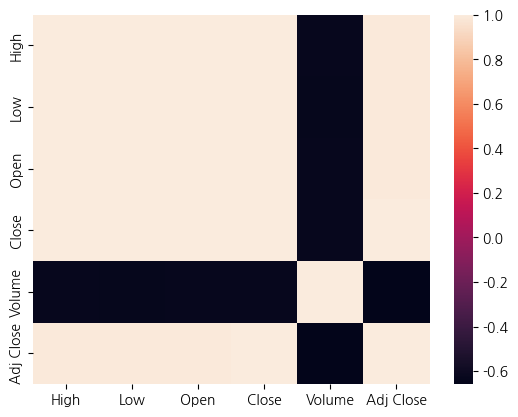

In [73]:
# heatmap by plt.pcolor()
sns.heatmap(df_corr)
plt.show()

In [74]:
from scipy import stats
stats.spearmanr(df.Year,df.High)

C:\Users\skyme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=0.9404365221722286, pvalue=0.0)

In [75]:
df

,Year,Month,Day,Date,High,Low,Open,Close,Volume,Adj Close
0,2009,12,31,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010,01,04,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010,01,05,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010,01,06,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010,01,07,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...,...,...,...,...
2260,2018,12,24,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2261,2018,12,26,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2262,2018,12,27,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2263,2018,12,28,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
